# CS532 Cloud Computing Systems - Semester Project

# A web diagnostic assistant using Machine Learning Algorithms, Part 1 
# Data Analysis and Machine Learning Model Implementation

Developer: Chu-An Tsai

This is the part of data analysis and machines learning algorithms implementation in the web diagnostic assistant. After evaluating all the models, the best one (high accuracy and low false negative rate) will be saved and used for the prediction in the web application. 

# Import libraries

In [98]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=2, rc=None)
matplotlib.rcParams['figure.figsize'] = [8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

# Data analysis

In [99]:
covid_data = pd.read_csv('Covid.csv')
covid_data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [101]:
missing_values = covid_data.isnull().sum() 

percent_missing = covid_data.isnull().sum()/covid_data.shape[0]*100 

value = {
    'missing_counts ':missing_values,
    'percent %':percent_missing  
}
covid_data_frame = pd.DataFrame(value)
covid_data_frame

,missing_counts,percent %
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Asthma,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0


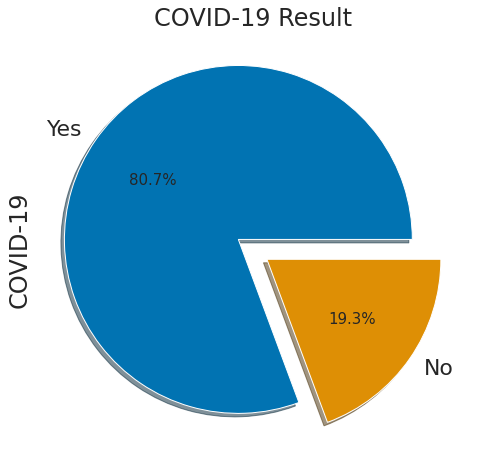

In [102]:
covid_data["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True)
plt.title('COVID-19 Result');


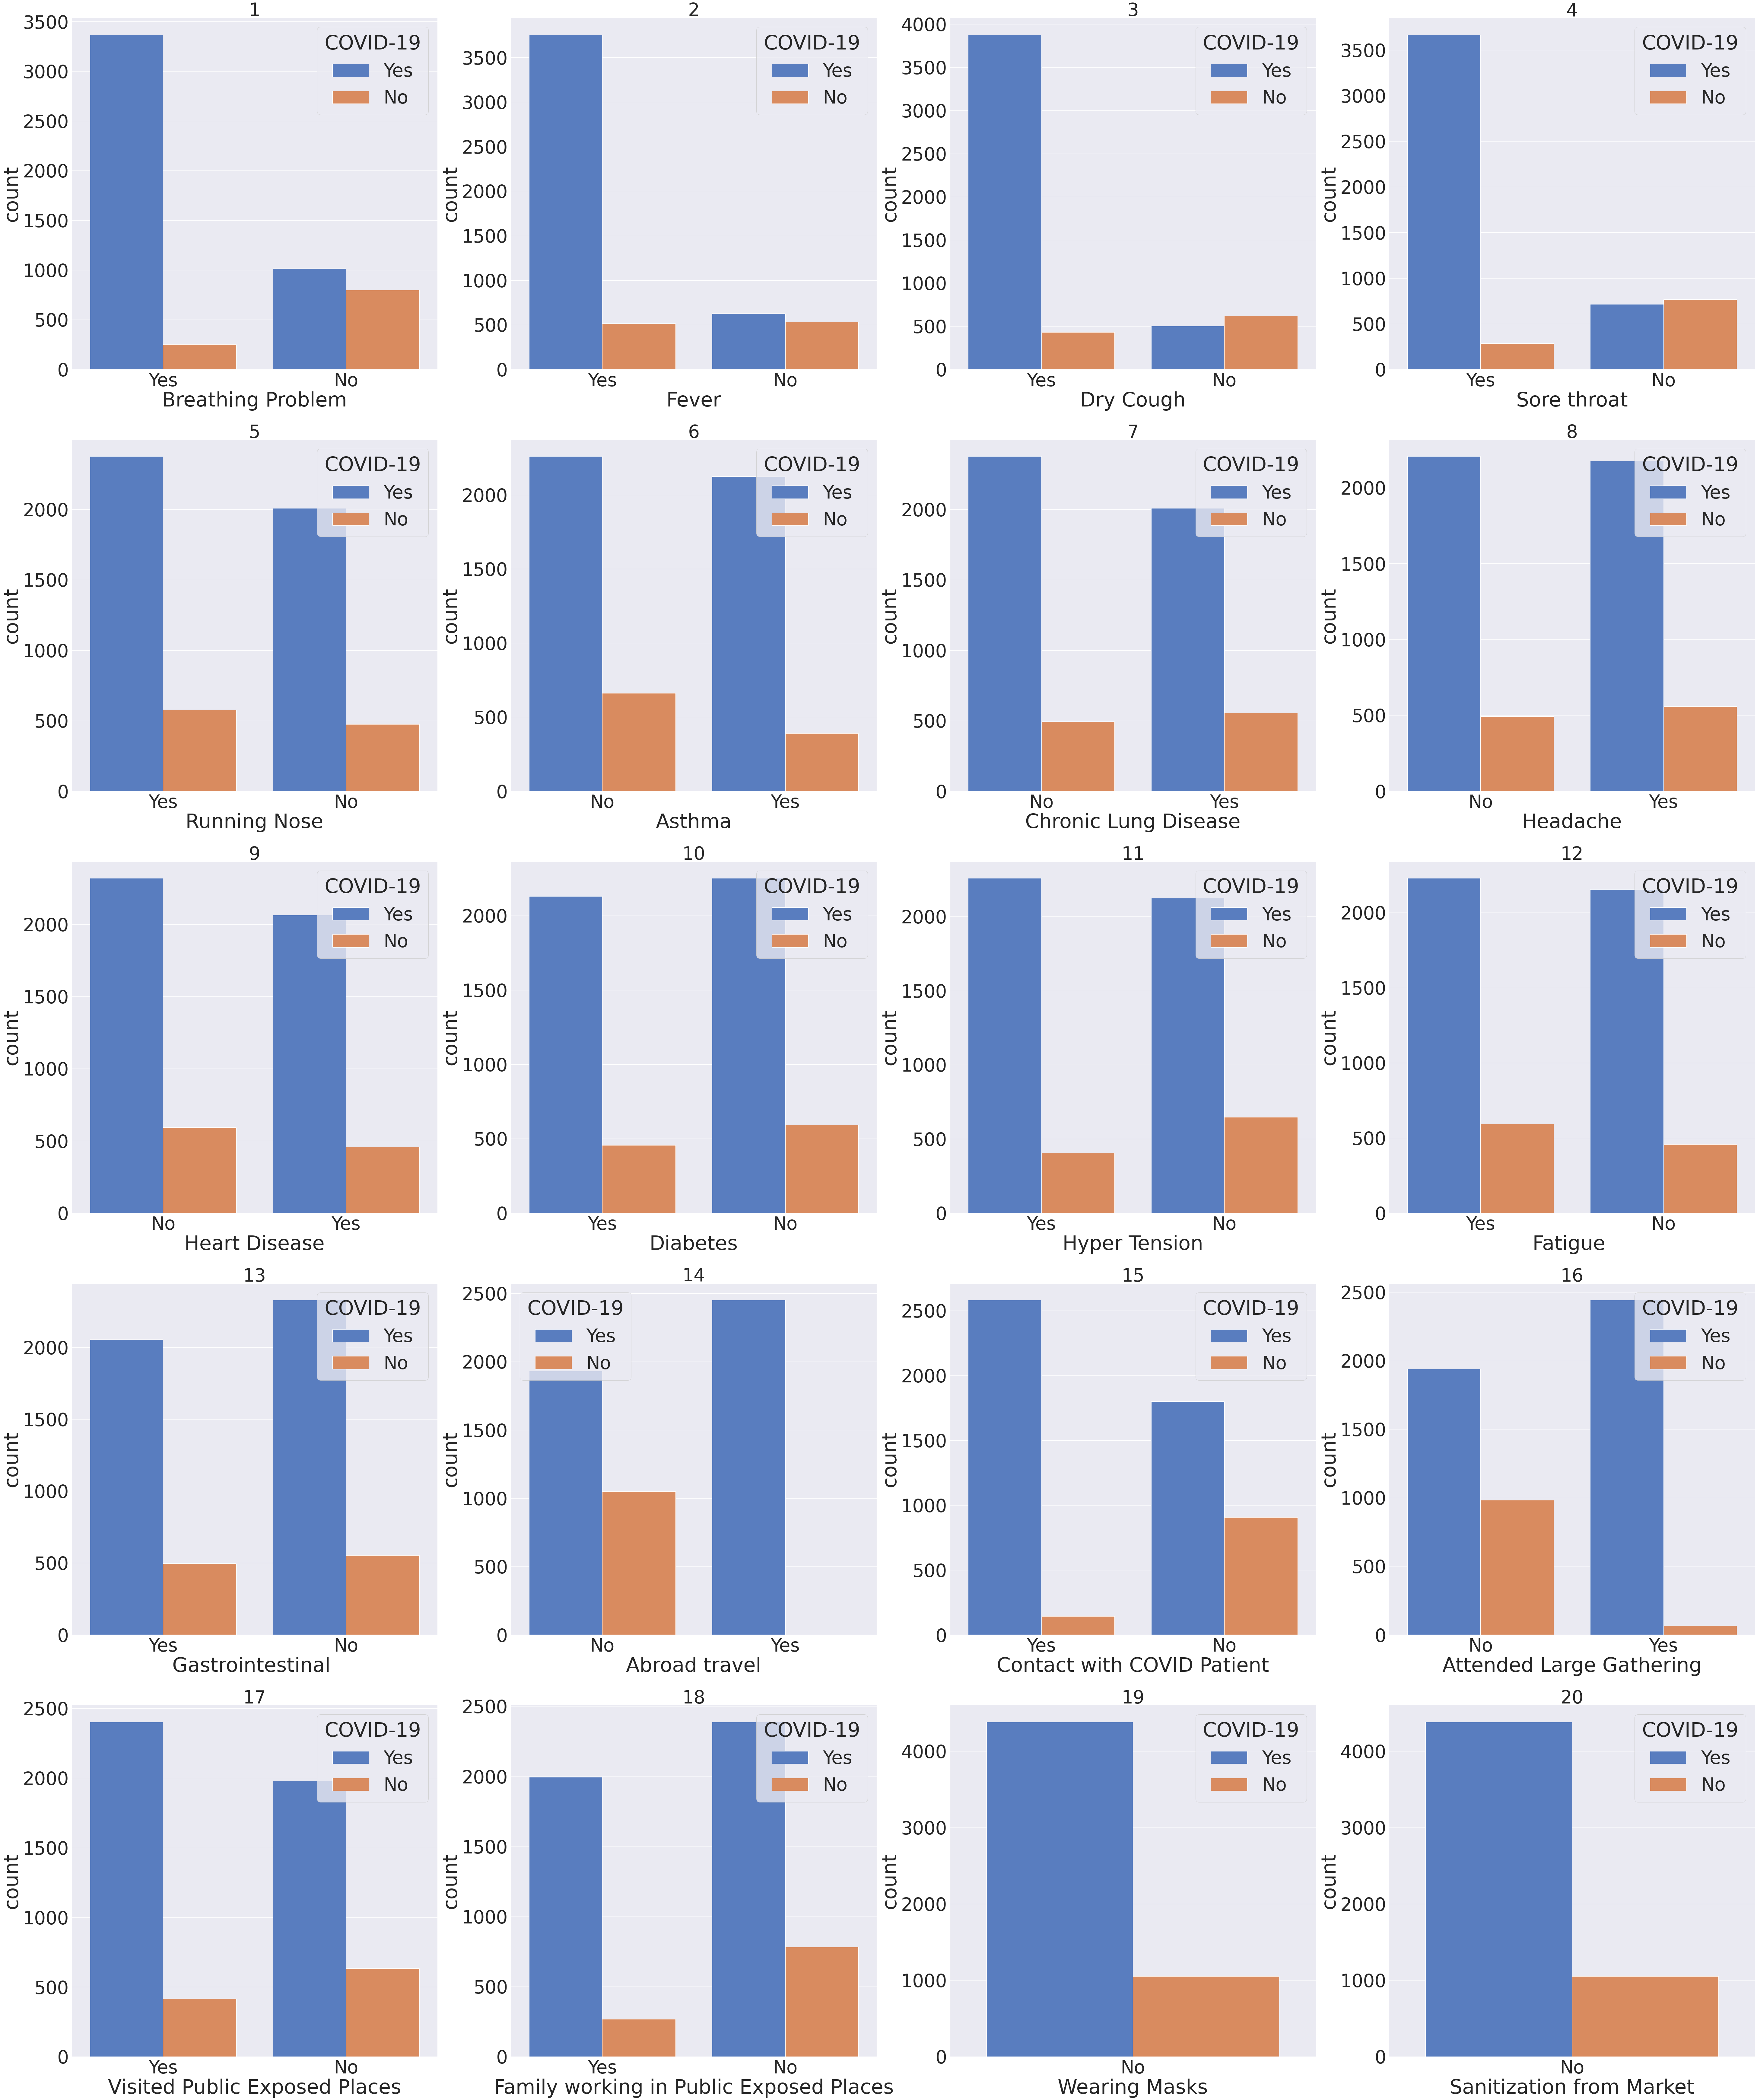

In [103]:
label_encoder = LabelEncoder()
s = (covid_data.dtypes == 'object')
object_cols = list(s[s].index)
i = 1

sns.set(context='notebook', style='darkgrid', palette='muted', font='sans-serif', font_scale=5.5, rc=None)
plt.figure(figsize=(100, 150))
for col in object_cols:
    plt.subplot(6,4,i)
    sns.countplot(x=col, hue='COVID-19', data=covid_data)
    plt.title(i, fontsize=60)
    plt.yticks(fontsize=60)

    #to increase x ticks 
    plt.xticks(fontsize=60)
    if i == 20:
        break
    else:
        i = i + 1
sns.set(context='notebook', style='darkgrid', palette='bright', font='sans-serif', font_scale=2, rc=None)

<AxesSubplot:xlabel='Breathing Problem', ylabel='count'>

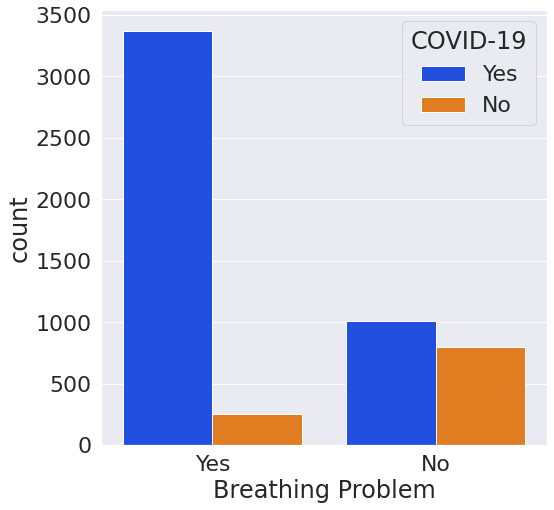

In [104]:
sns.countplot(x='Breathing Problem', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Fever', ylabel='count'>

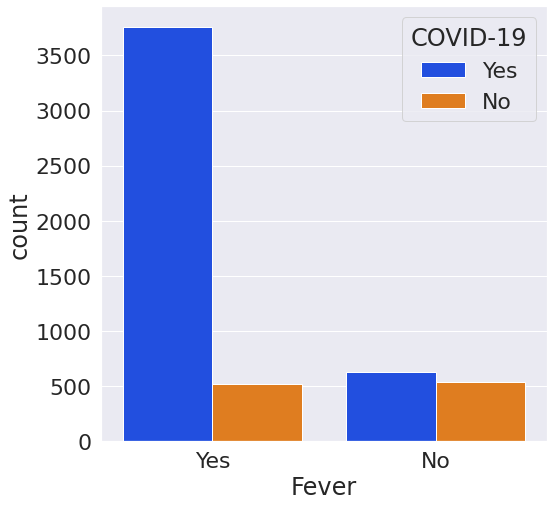

In [105]:
sns.countplot(x='Fever', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Dry Cough', ylabel='count'>

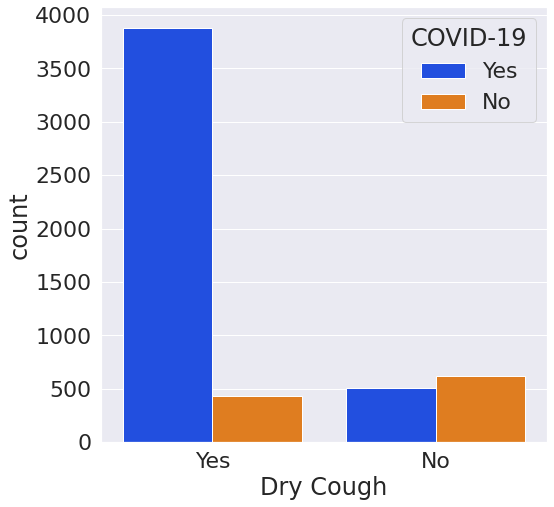

In [106]:
sns.countplot(x='Dry Cough', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Sore throat', ylabel='count'>

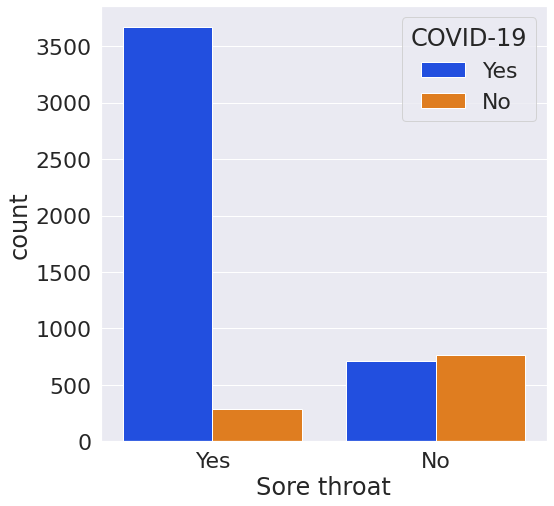

In [107]:
sns.countplot(x='Sore throat', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Running Nose', ylabel='count'>

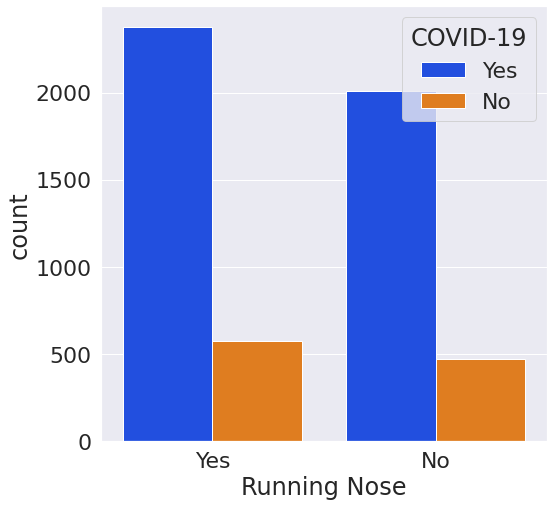

In [108]:
sns.countplot(x='Running Nose', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Asthma', ylabel='count'>

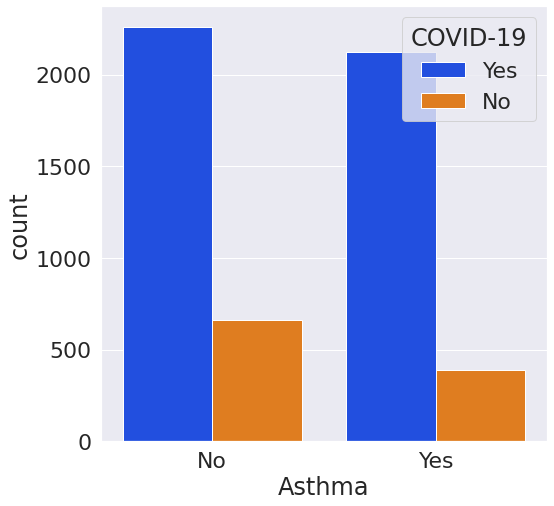

In [109]:
sns.countplot(x='Asthma', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Chronic Lung Disease', ylabel='count'>

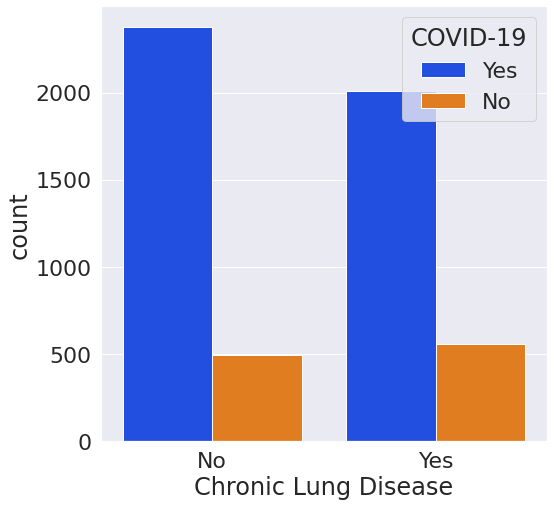

In [110]:
sns.countplot(x='Chronic Lung Disease', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Headache', ylabel='count'>

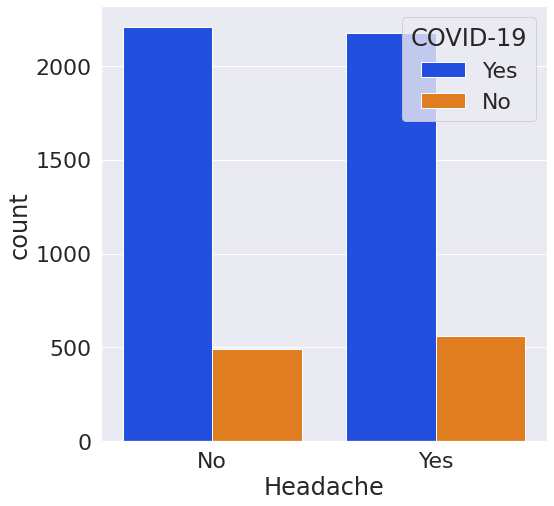

In [111]:
sns.countplot(x='Headache', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Heart Disease', ylabel='count'>

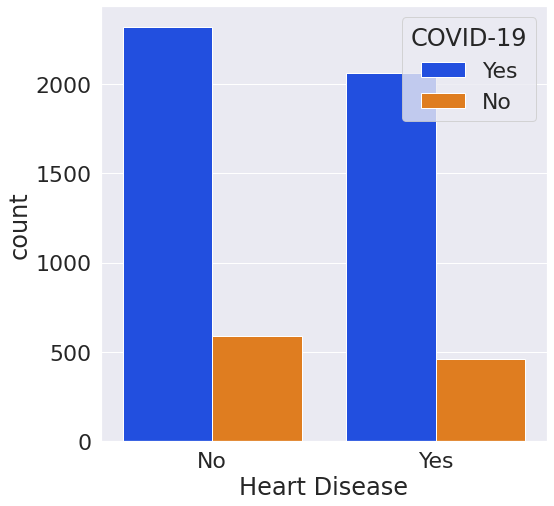

In [112]:
sns.countplot(x='Heart Disease', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Diabetes', ylabel='count'>

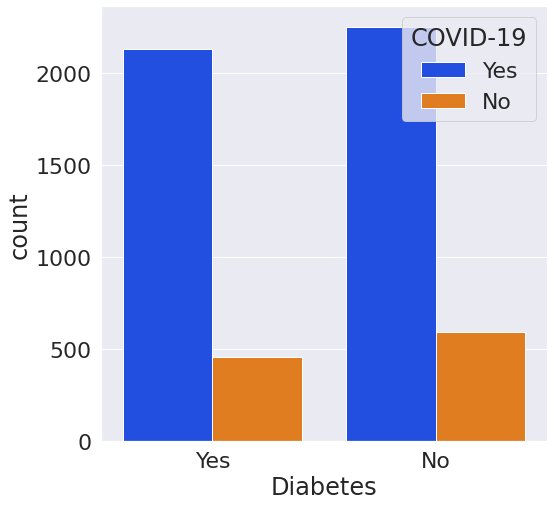

In [113]:
sns.countplot(x='Diabetes', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Hyper Tension', ylabel='count'>

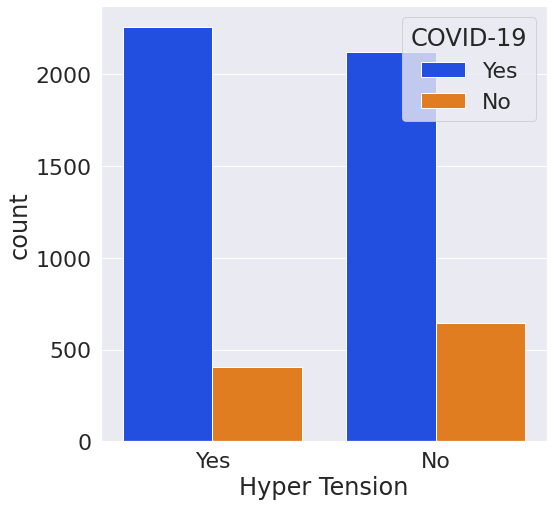

In [114]:
sns.countplot(x='Hyper Tension', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Fatigue ', ylabel='count'>

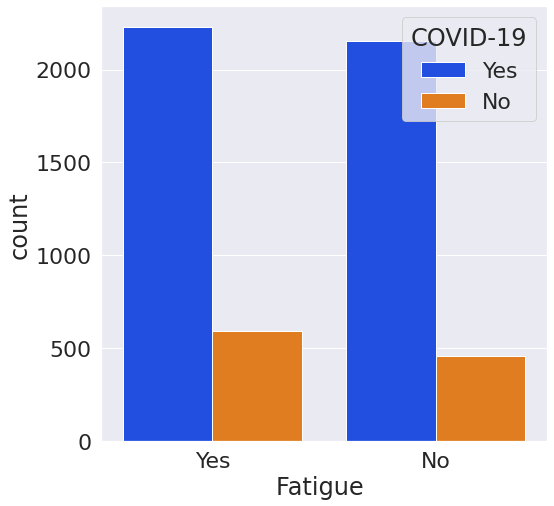

In [115]:
sns.countplot(x='Fatigue ', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Gastrointestinal ', ylabel='count'>

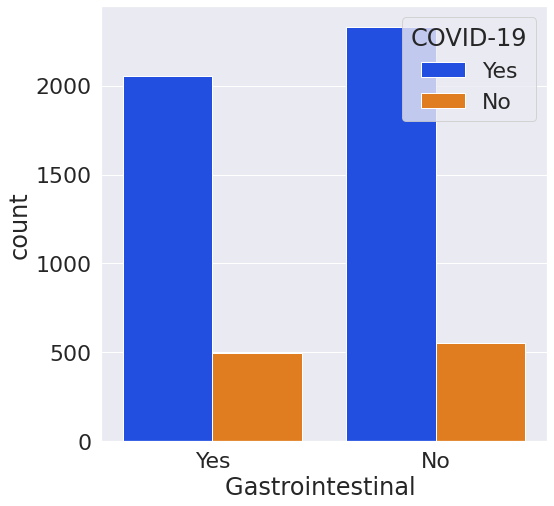

In [116]:
sns.countplot(x='Gastrointestinal ', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Abroad travel', ylabel='count'>

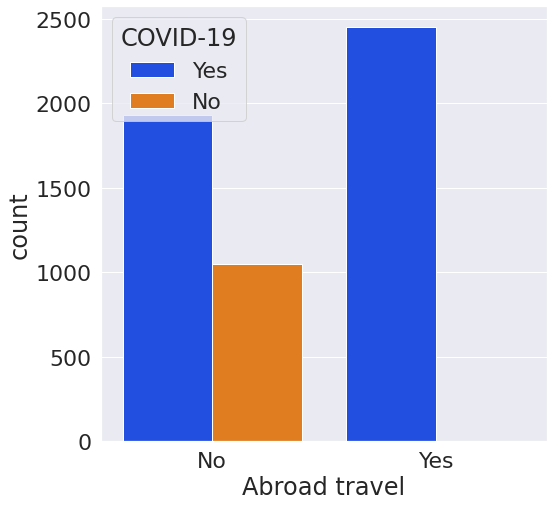

In [117]:
sns.countplot(x='Abroad travel', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Contact with COVID Patient', ylabel='count'>

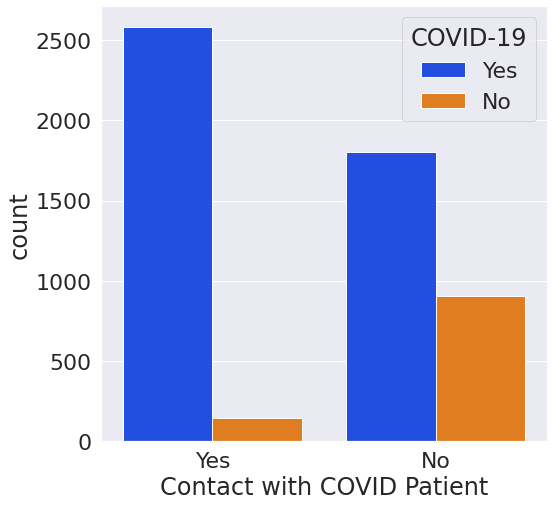

In [118]:
sns.countplot(x='Contact with COVID Patient', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Attended Large Gathering', ylabel='count'>

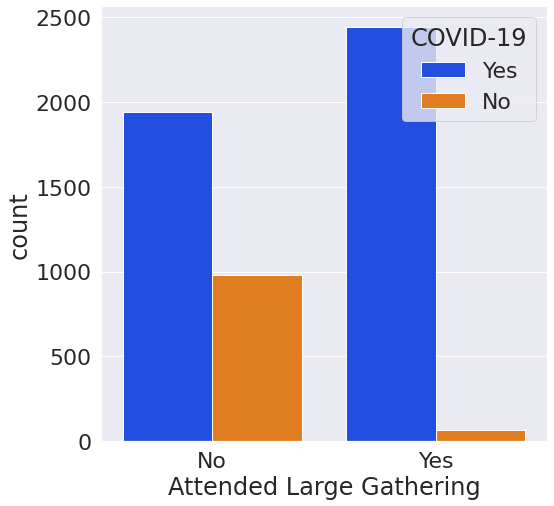

In [119]:
sns.countplot(x='Attended Large Gathering', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Visited Public Exposed Places', ylabel='count'>

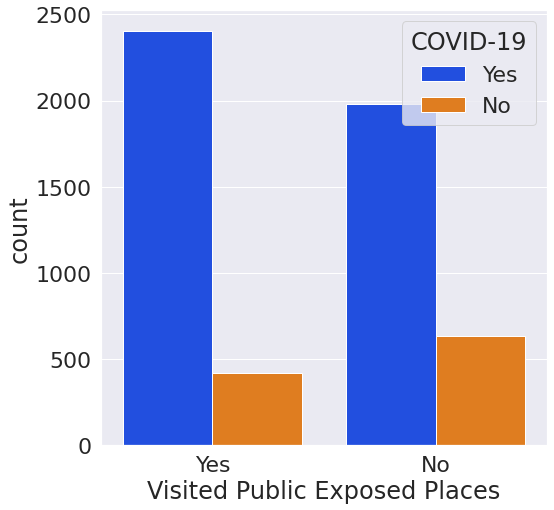

In [120]:
sns.countplot(x='Visited Public Exposed Places', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Family working in Public Exposed Places', ylabel='count'>

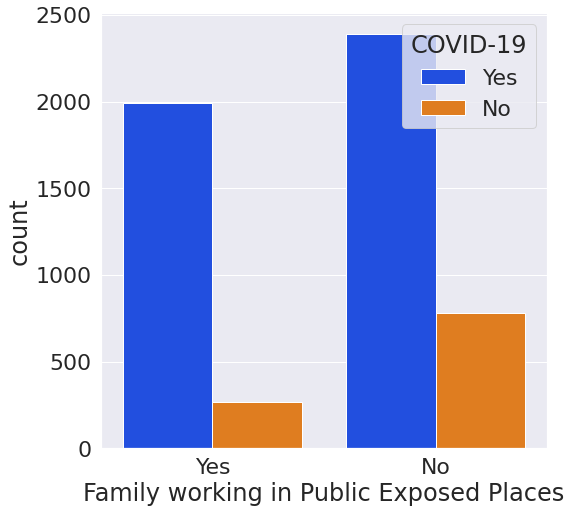

In [121]:
sns.countplot(x='Family working in Public Exposed Places', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Wearing Masks', ylabel='count'>

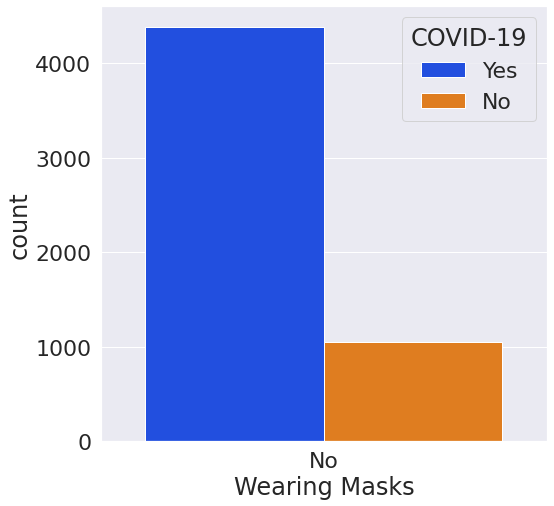

In [122]:
sns.countplot(x='Wearing Masks', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Sanitization from Market', ylabel='count'>

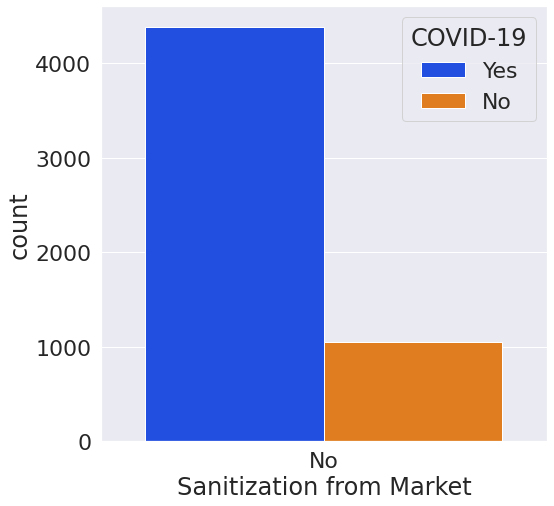

In [123]:
sns.countplot(x='Sanitization from Market', hue='COVID-19', data=covid_data)

In [124]:
# Do label encoding for fitting ML algorithms
label_covid_data = covid_data.copy()
for col in object_cols:
    label_covid_data[col] = label_encoder.fit_transform(label_covid_data[col])
label_covid_data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
# correlation map
corr = label_covid_data.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,nan,nan,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,nan,nan,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,nan,nan,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,nan,nan,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,nan,nan,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,nan,nan,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,nan,nan,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,nan,nan,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,nan,nan,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,nan,nan,0.040627


In [126]:
# Drop two colmuns that have one value in this dataset
label_covid_data = label_covid_data.drop('Wearing Masks',axis=1)
label_covid_data = label_covid_data.drop('Sanitization from Market',axis=1)

In [127]:
corr = label_covid_data.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,0.040627


# ML algorithms implementation

In [128]:
X = label_covid_data.drop('COVID-19',axis=1)
y = label_covid_data['COVID-19']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=428)

# 1. Logistic Regression

In [215]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(random_state=5)
lgr.fit(x_train, y_train)
lgr_pred = lgr.predict(x_test)

print('1. Logistic Regression:')
print("\nConfusion metrix:\n", confusion_matrix(y_test, lgr_pred))
tn, fp, fn, tp = confusion_matrix(y_test, lgr_pred).ravel()
print("\nTN: ", tn,"\nFP: ", fp,"\nFN: ", fn,"\nTP: ", tp)
prec_lgr = (tp/(tp+fp)).round(5)
recall_lgr = (tp/(tp+fn)).round(5)
f1_lgr = (2*prec_lgr*recall_lgr/(prec_lgr + recall_lgr)).round(5)
fnr_lgr = (fn/(fn+tp)).round(5)
print("Precision:", prec_lgr)
print("Recall:", recall_lgr)
print("False Negative Rate:", fnr_lgr)
print("F1 score:", f1_lgr)

rep_lgr = classification_report(y_test, lgr_pred)
acc_lgr = accuracy_score(y_test, lgr_pred)

print('\nClassification report:')
print(rep_lgr)

# 5-fold cross validation
lgr_mean_acc = cross_val_score(lgr, X, y, cv=5).mean()
print("5-fold cross validation score: ", lgr_mean_acc.round(4))

1. Logistic Regression:

Confusion metrix:
 [[ 342   39]
 [  24 1769]]

TN:  342 
FP:  39 
FN:  24 
TP:  1769
Precision: 0.97843
Recall: 0.98661
False Negative Rate: 0.01339
F1 score: 0.9825

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       381
           1       0.98      0.99      0.98      1793

    accuracy                           0.97      2174
   macro avg       0.96      0.94      0.95      2174
weighted avg       0.97      0.97      0.97      2174

5-fold cross validation score:  0.9185


# 2. Decision Tree

In [214]:
from sklearn import tree
tr = tree.DecisionTreeClassifier(random_state=532)
tr.fit(x_train, y_train)
tr_pred = tr.predict(x_test)

print('2. Decision Tree:')
print("\nConfusion metrix:\n", confusion_matrix(y_test, tr_pred))
tn, fp, fn, tp = confusion_matrix(y_test, tr_pred).ravel()
print("\nTN: ", tn,"\nFP: ", fp,"\nFN: ", fn,"\nTP: ", tp)
prec_tr=(tp/(tp+fp)).round(5)
recall_tr=(tp/(tp+fn)).round(5)
f1_tr = (2*prec_tr*recall_tr/(prec_tr + recall_tr)).round(5)
fnr_tr = (fn/(fn+tp)).round(5)
print("Precision:", prec_tr)
print("Recall:", recall_tr)
print("False Negative Rate:", fnr_tr)
print("F1 score:", f1_tr)

rep_tr = classification_report(y_test, tr_pred)
acc_tr = accuracy_score(y_test, tr_pred)

print('\nClassification report:')
print(rep_tr)

# 5-fold cross validation
tr_mean_acc = cross_val_score(tr, X, y, cv=5).mean()
print("5-fold cross validation score: ", tr_mean_acc.round(4))

2. Decision Tree:

Confusion metrix:
 [[ 370   11]
 [  31 1762]]

TN:  370 
FP:  11 
FN:  31 
TP:  1762
Precision: 0.9938
Recall: 0.98271
False Negative Rate: 0.01729
F1 score: 0.98822

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       381
           1       0.99      0.98      0.99      1793

    accuracy                           0.98      2174
   macro avg       0.96      0.98      0.97      2174
weighted avg       0.98      0.98      0.98      2174

5-fold cross validation score:  0.8408


# 3. K-Nearest Keighbors

In [213]:
from sklearn.neighbors import KNeighborsClassifier

'''
# Parameter tuning for getting the best k value
k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27]
for n in k:
    model_knn = KNeighborsClassifier(n_neighbors=n)
    knn_mean_acc = cross_val_score(model_knn, X, y, cv=10).mean()
    print("k = ", n, ",acc = ",knn_mean_acc)
'''
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

print('3. K-Nearest Keighbors:')
print("\nConfusion metrix:\n", confusion_matrix(y_test, knn_pred))
tn, fp, fn, tp = confusion_matrix(y_test, knn_pred).ravel()
print("\nTN: ", tn,"\nFP: ", fp,"\nFN: ", fn,"\nTP: ", tp)
prec_knn = (tp/(tp+fp)).round(5)
recall_knn = (tp/(tp+fn)).round(5)
f1_knn = (2*prec_knn*recall_knn/(prec_knn + recall_knn)).round(5)
fnr_knn = (fn/(fn+tp)).round(5)
print("Precision:", prec_knn)
print("Recall:", recall_knn)
print("False Negative Rate:", fnr_knn)
print("F1 score:", f1_knn)

rep_knn = classification_report(y_test, knn_pred)
acc_knn = accuracy_score(y_test, knn_pred)

print('\nClassification report:')
print(rep_knn)

# 5-fold cross validation
knn_mean_acc = cross_val_score(knn, X, y, cv=5).mean()
print("5-fold cross validation score: ",knn_mean_acc.round(4))


3. K-Nearest Keighbors:

Confusion metrix:
 [[ 334   47]
 [  25 1768]]

TN:  334 
FP:  47 
FN:  25 
TP:  1768
Precision: 0.9741
Recall: 0.98606
False Negative Rate: 0.01394
F1 score: 0.98004

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       381
           1       0.97      0.99      0.98      1793

    accuracy                           0.97      2174
   macro avg       0.95      0.93      0.94      2174
weighted avg       0.97      0.97      0.97      2174

5-fold cross validation score:  0.908


# 4. Random Forest

In [212]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators=890, random_state=532)
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(x_test)

print('4. Random Forest:')
print("\nConfusion metrix:\n", confusion_matrix(y_test, rfr_pred))
tn, fp, fn, tp = confusion_matrix(y_test, rfr_pred).ravel()
print("\nTN: ", tn,"\nFP: ", fp,"\nFN: ", fn,"\nTP: ", tp)
prec_rfr = (tp/(tp+fp)).round(5)
recall_rfr = (tp/(tp+fn)).round(5)
f1_rfr = (2*prec_rfr*recall_rfr/(prec_rfr + recall_rfr)).round(5)
fnr_rfr = (fn/(fn+tp)).round(5)
print("Precision:", prec_rfr)
print("Recall:", recall_rfr)
print("False Negative Rate:", fnr_rfr)
print("F1 score:", f1_rfr)

rep_rfr = classification_report(y_test, rfr_pred)
acc_rfr = accuracy_score(y_test, rfr_pred)

print('\nClassification report:')
print(rep_rfr)

# 5-fold cross validation
rfr_mean_acc = cross_val_score(rfr, X, y, cv=5).mean()
print("5-fold cross validation score: ", rfr_mean_acc.round(4))

4. Random Forest:

Confusion metrix:
 [[ 370   11]
 [  31 1762]]

TN:  370 
FP:  11 
FN:  31 
TP:  1762
Precision: 0.9938
Recall: 0.98271
False Negative Rate: 0.01729
F1 score: 0.98822

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       381
           1       0.99      0.98      0.99      1793

    accuracy                           0.98      2174
   macro avg       0.96      0.98      0.97      2174
weighted avg       0.98      0.98      0.98      2174

5-fold cross validation score:  0.9034


# 5. Naive Bayes

In [209]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)

print('5. Naive Bayes:')
print("\nConfusion metrix:\n", confusion_matrix(y_test, nb_pred))
tn, fp, fn, tp = confusion_matrix(y_test, nb_pred).ravel()
print("\nTN: ", tn,"\nFP: ", fp,"\nFN: ", fn,"\nTP: ", tp)
prec_nb = (tp/(tp+fp)).round(5)
recall_nb = (tp/(tp+fn)).round(5)
f1_nb = (2*prec_nb*recall_nb/(prec_nb + recall_nb)).round(5)
fnr_lgr = (fn/(fn+tp)).round(5)
print("Precision:", prec_nb)
print("Recall:", recall_nb)
print("False Negative Rate:", fnr_nb)
print("F1 score:", f1_nb)

rep_nb = classification_report(y_test, nb_pred)
acc_nb = accuracy_score(y_test, nb_pred)

print('\nClassification report:')
print(rep_nb)

# 5-fold cross validation
nb_mean_acc = cross_val_score(nb, X, y, cv=5).mean()
print("5-fold cross validation score: ", nb_mean_acc.round(4))

5. Naive Bayes:

Confusion metrix:
 [[ 381    0]
 [ 563 1230]]

TN:  381 
FP:  0 
FN:  563 
TP:  1230
Precision: 1.0
Recall: 0.686
False Negative Rate: 0.314
F1 score: 0.81376

Classification report:
              precision    recall  f1-score   support

           0       0.40      1.00      0.58       381
           1       1.00      0.69      0.81      1793

    accuracy                           0.74      2174
   macro avg       0.70      0.84      0.69      2174
weighted avg       0.90      0.74      0.77      2174

5-fold cross validation score:  0.7486


# 6. Support Vector Machines

In [217]:
from sklearn import svm
svm = svm.SVC(kernel='linear') 
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)

print('6. Support Vector Machines:')
print("\nConfusion metrix:\n", confusion_matrix(y_test, svm_pred))
tn, fp, fn, tp = confusion_matrix(y_test, svm_pred).ravel()
print("\nTN: ", tn,"\nFP: ", fp,"\nFN: ", fn,"\nTP: ", tp)
prec_svm = (tp/(tp+fp)).round(5)
recall_svm = (tp/(tp+fn)).round(5)
f1_svm = (2*prec_svm*recall_svm/(prec_svm + recall_svm)).round(5)
fnr_svm = (fn/(fn+tp)).round(5)
print("Precision:", prec_svm)
print("Recall:", recall_svm)
print("False Negative Rate:", fnr_svm)
print("F1 score:", f1_svm)

rep_svm = classification_report(y_test, svm_pred)
acc_svm = accuracy_score(y_test, svm_pred)

print('\nClassification report:')
print(rep_svm)

# 5-fold cross validation
svm_mean_acc = cross_val_score(svm, X, y, cv=5).mean()
print("5-fold cross validation score: ", svm_mean_acc.round(4))

6. Support Vector Machines:

Confusion metrix:
 [[ 316   65]
 [   1 1792]]

TN:  316 
FP:  65 
FN:  1 
TP:  1792
Precision: 0.965
Recall: 0.99944
False Negative Rate: 0.00056
F1 score: 0.98192

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91       381
           1       0.96      1.00      0.98      1793

    accuracy                           0.97      2174
   macro avg       0.98      0.91      0.94      2174
weighted avg       0.97      0.97      0.97      2174

5-fold cross validation score:  0.9085


# Model Evaluation

In [222]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 'Random Forest', 
              'Naive Bayes', 'Support Vector Machines'],
    'Accuracy': [acc_lgr, acc_tr, acc_knn, acc_rfr, acc_nb, acc_svm],
    'Precision': [prec_lgr, prec_tr, prec_knn, prec_rfr, prec_nb, prec_svm],
    'Recall': [recall_lgr, recall_tr, recall_knn, recall_rfr, recall_nb, recall_svm],
    'F1 score': [f1_lgr, f1_tr, f1_knn, f1_rfr, f1_nb, f1_svm],
    'FN Rate': [fnr_lgr, fnr_tr, fnr_knn, fnr_rfr, fnr_nb, fnr_svm],
    '5-Fold CV': [lgr_mean_acc.round(5), tr_mean_acc.round(5),knn_mean_acc.round(5), 
                  rfr_mean_acc.round(5), nb_mean_acc.round(5), svm_mean_acc.round(5)]
})
#models.sort_values(by='FN Rate')#, ascending=True)
models

,Model,Accuracy,Precision,Recall,F1 score,FN Rate,5-Fold CV
0,Logistic Regression,0.971021,0.97843,0.98661,0.98250,0.01339,0.91847
1,Decision Tree,0.980681,0.99380,0.98271,0.98822,0.01729,0.84079
2,K-Nearest Neighbors,0.966881,0.97410,0.98606,0.98004,0.01394,0.90797
3,Random Forest,0.980681,0.99380,0.98271,0.98822,0.01729,0.90338
4,Naive Bayes,0.741030,1.00000,0.68600,0.98822,0.31400,0.74865
5,Support Vector Machines,0.969641,0.96500,0.99944,0.98192,0.00056,0.90854



ROC curve comparision:


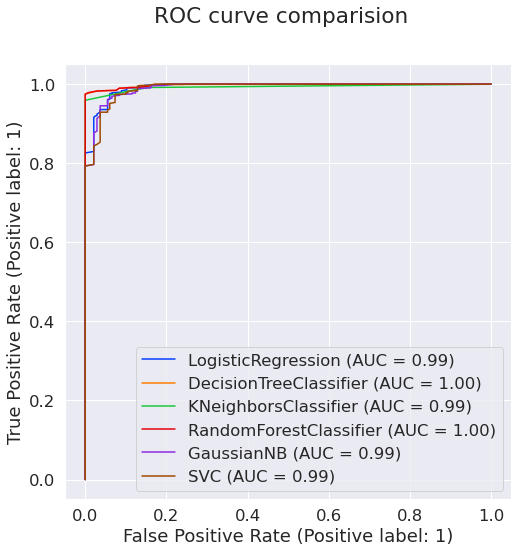

In [196]:
lgr_disp = plot_roc_curve(lgr, x_test, y_test)
tr_disp = plot_roc_curve(tr, x_test, y_test, ax=lgr_disp.ax_)
knn_disp = plot_roc_curve(knn, x_test, y_test, ax=tr_disp.ax_)
rfr_disp = plot_roc_curve(rfr, x_test, y_test, ax=knn_disp.ax_)
nb_disp = plot_roc_curve(nb, x_test, y_test, ax=rfr_disp.ax_)
svm_disp = plot_roc_curve(svm, x_test, y_test, ax=nb_disp.ax_)

print('\nROC curve comparision:')
svm_disp.figure_.suptitle("ROC curve comparision")
plt.show()

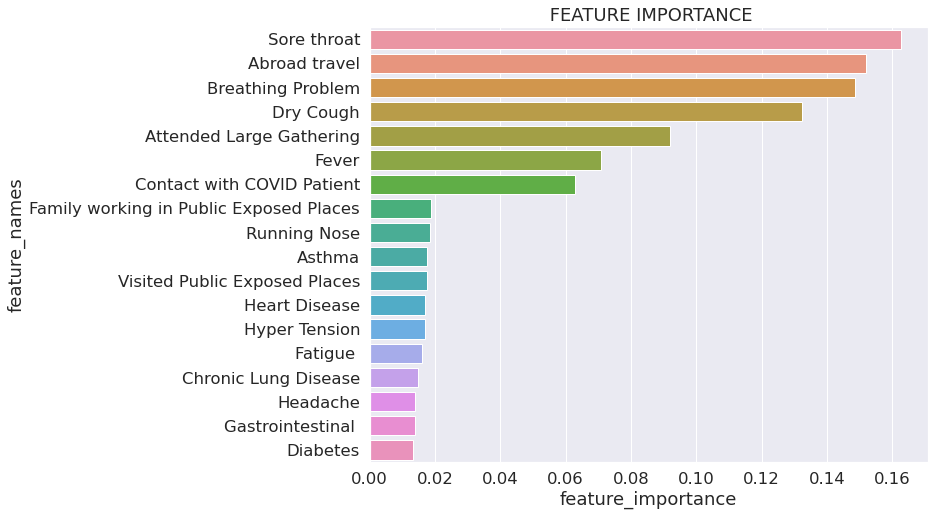

In [166]:
sns.set(context='notebook', style='darkgrid', palette='bright', font='sans-serif', font_scale=1.5, rc=None)
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(' FEATURE IMPORTANCE')
    #plt.xlabel("IMPORTANCE")
    #plt.ylabel("FEATURE NAMES")
    
plot_feature_importance(rfr.feature_importances_,X.columns,'RANDOM FOREST')

# Save the model for the Web App

In [205]:
# Save the model as serialized object pickle
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(clf, file)